In [44]:
from drawdata import ScatterWidget

widget = ScatterWidget()

In [45]:
widget

ScatterWidget()

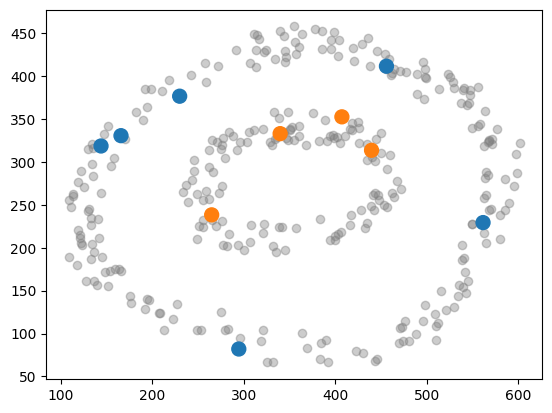

In [51]:
import polars as pl
import matplotlib.pylab as plt
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

df = widget.data_as_polars
subset = df.sample(10)

plt.scatter(df['x'], df['y'], color='gray', alpha=0.4)
plt.scatter(subset['x'], subset['y'], color=subset['color'], s=100);

In [98]:
import polars as pl
import matplotlib.pylab as plt
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

df = widget.data_as_polars

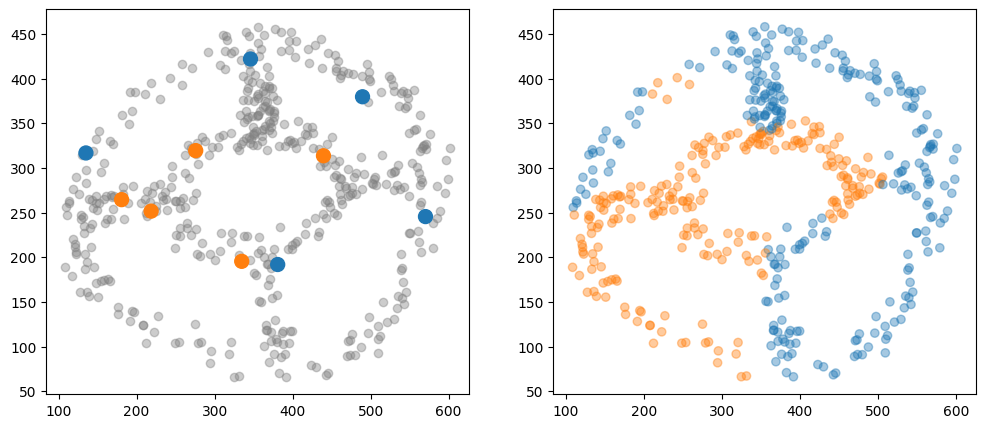

In [99]:
subset = df.sample(10)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(df['x'], df['y'], color='gray', alpha=0.4)
plt.scatter(subset['x'], subset['y'], color=subset['color'], s=100)

clf = KNeighborsClassifier(n_neighbors=1).fit(subset[['x', 'y']], subset['color'])

plt.subplot(122)
plt.scatter(df['x'], df['y'], color=clf.predict(df[['x', 'y']]), alpha=0.4)

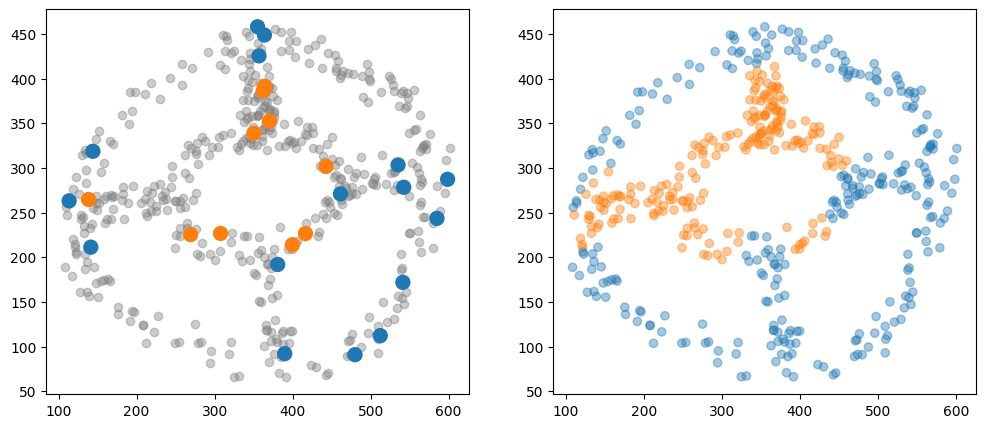

In [101]:
import numpy as np
from sklearn.semi_supervised import LabelSpreading, LabelPropagation

X = df[['x', 'y']]
y = -np.ones(df.shape[0])

idx = np.random.random(df.shape[0]) > 0.96
lookup = {k: i for i, k in enumerate(set(df['color'].to_list()))}
reverse_lookup = {v:k for k, v in lookup.items()}

for i, val in enumerate(idx):
    if val:
        y[i] = lookup[df['color'][i]]

subset = df.filter(pl.lit(idx))

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(df['x'], df['y'], color='gray', alpha=0.4)
plt.scatter(subset['x'], subset['y'], color=subset['color'], s=100)


clf = LabelPropagation(kernel="knn").fit(X, y)

plt.subplot(122)
plt.scatter(df['x'], df['y'], color=[reverse_lookup[c] for c in clf.predict(X)], alpha=0.4);